<img src="zona_jobs.png">

# Importo librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Lectura de archivos

In [2]:
usuarios_educacion   = pd.read_csv('../data/fiuba_1_postulantes_educacion.csv', dtype = {
    'nombre': 'category',
    'estado': 'category'
})
usuarios_sexo_y_edad = pd.read_csv('../data/fiuba_2_postulantes_genero_y_edad.csv', dtype = {
    'sexo': 'category'    
}) 
avisos_detalles      = pd.read_csv('../data/fiuba_6_avisos_detalle.csv', dtype= {                                                                            'nombre_zona': 'category',
    'ciudad': 'category',
    'tipo_de_trabajo': 'category',
    'nivel_laboral': 'category',
    'nombre_area': 'category'
})
avisos_visitas       = pd.read_csv('../data/fiuba_3_vistas.csv', parse_dates=['timestamp'])
avisos_postulaciones = pd.read_csv('../data/fiuba_4_postulaciones.csv', parse_dates=['fechapostulacion'])

# Merges necesarios 

In [3]:
usuarios_detalle                             = pd.merge(usuarios_educacion                , usuarios_sexo_y_edad, how='inner', left_on='idpostulante', right_on='idpostulante')
postulaciones_con_detalle_de_aviso           = pd.merge(avisos_postulaciones              , avisos_detalles     , how='inner', left_on='idaviso'     , right_on='idaviso')
postulaciones_con_detalle_de_aviso_y_usuario = pd.merge(postulaciones_con_detalle_de_aviso, usuarios_detalle    , how='inner', left_on='idpostulante', right_on='idpostulante')
visitas_con_detalle_de_aviso                 = pd.merge(avisos_visitas                    , avisos_detalles     , how='inner', left_on='idAviso'     , right_on='idaviso')
visitas_con_detalle_de_aviso_y_usuario       = pd.merge(visitas_con_detalle_de_aviso      , usuarios_detalle    , how='inner', left_on='idpostulante', right_on='idpostulante')

# Cantidad de avisos en los diferentes niveles laborales

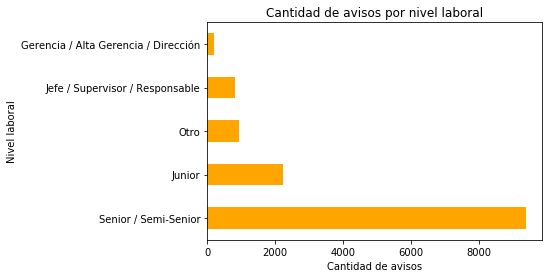

In [4]:
ax = plt.gca()
avisos_detalles.groupby('nivel_laboral')['nivel_laboral'].count().sort_values(ascending=False)\
               .plot(kind='barh', color="orange", title="Cantidad de avisos por nivel laboral");
ax.set_xlabel('Cantidad de avisos')
ax.set_ylabel('Nivel laboral');

# Cuales son las areas laborales con mayor cantidad de avisos?

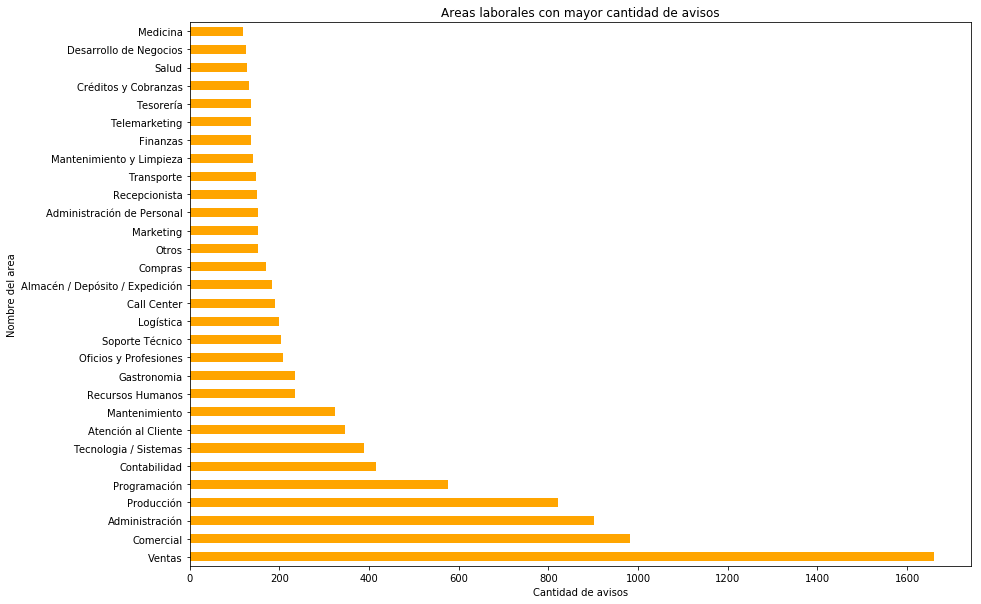

In [5]:
ax = plt.gca()
avisos_detalles.groupby('nombre_area')['nombre_area'].count().sort_values(ascending=False).head(30)\
               .plot(kind='barh', color='orange',figsize=(14,10), title="Areas laborales con mayor cantidad de avisos");
ax.set_xlabel('Cantidad de avisos');
ax.set_ylabel('Nombre del area');

# Cuales son las areas laborales con menor cantidad de avisos?

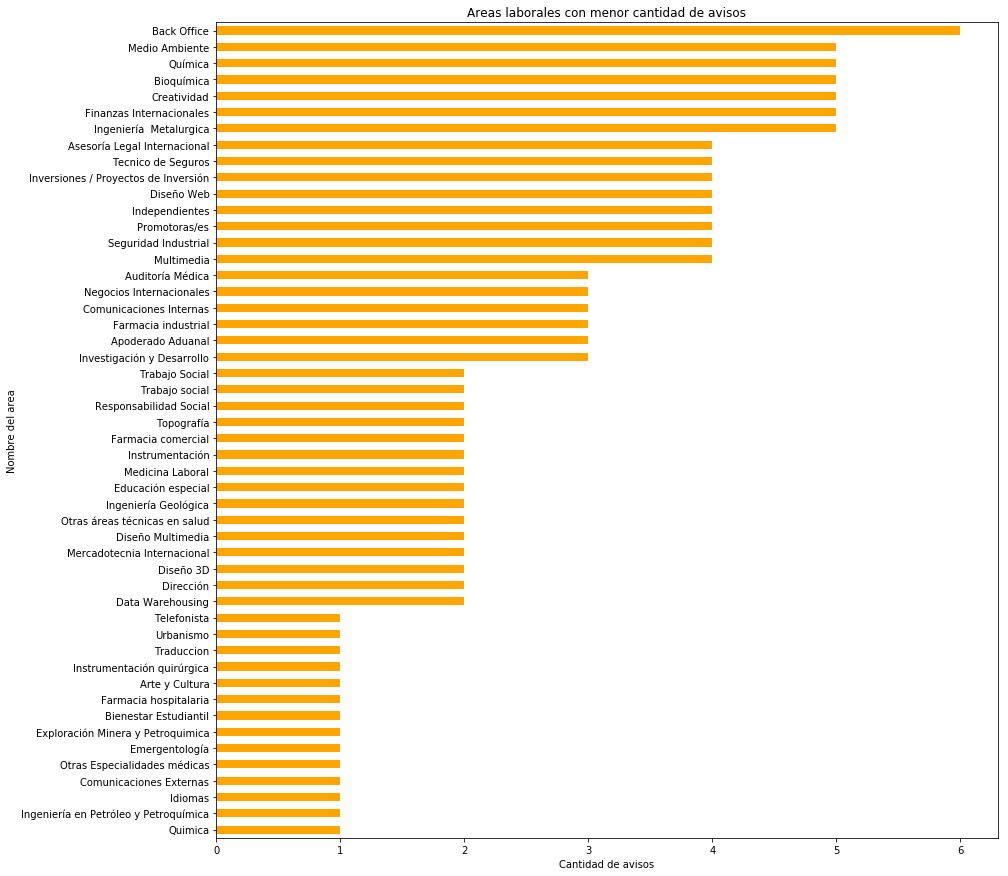

In [6]:
ax = plt.gca()
avisos_detalles.groupby('nombre_area')['nombre_area'].count().sort_values(ascending=True).head(50)\
               .plot(kind='barh', figsize=(14,15), color='orange', title='Areas laborales con menor cantidad de avisos');
ax.set_xlabel('Cantidad de avisos');
ax.set_ylabel('Nombre del area');

# Cuales son las areas laborales con mayor cantidad de postulaciones?

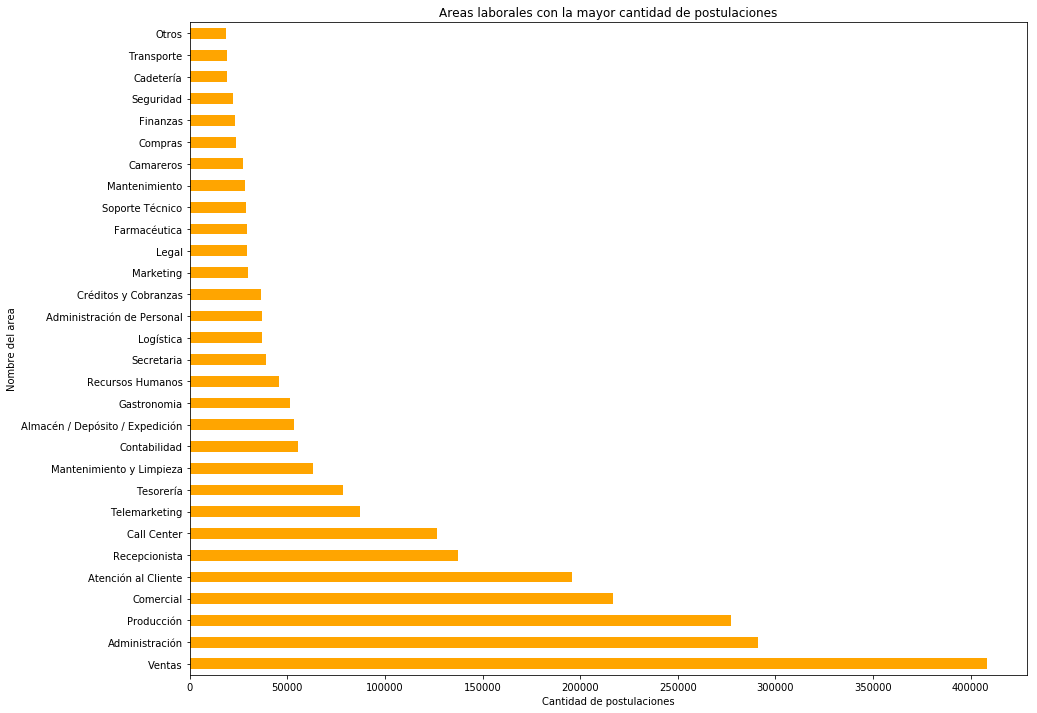

In [8]:
ax = plt.gca()
postulaciones_con_detalle_de_aviso.groupby('nombre_area')['nombre_area'].count().sort_values(ascending=False).head(30)\
                                     .plot(kind='barh', figsize=(15,12), color='orange', title='Areas laborales con la mayor cantidad de postulaciones');
ax.set_xlabel('Cantidad de postulaciones');
ax.set_ylabel('Nombre del area');

# Cuales son las areas laborales con menor cantidad de postulaciones?

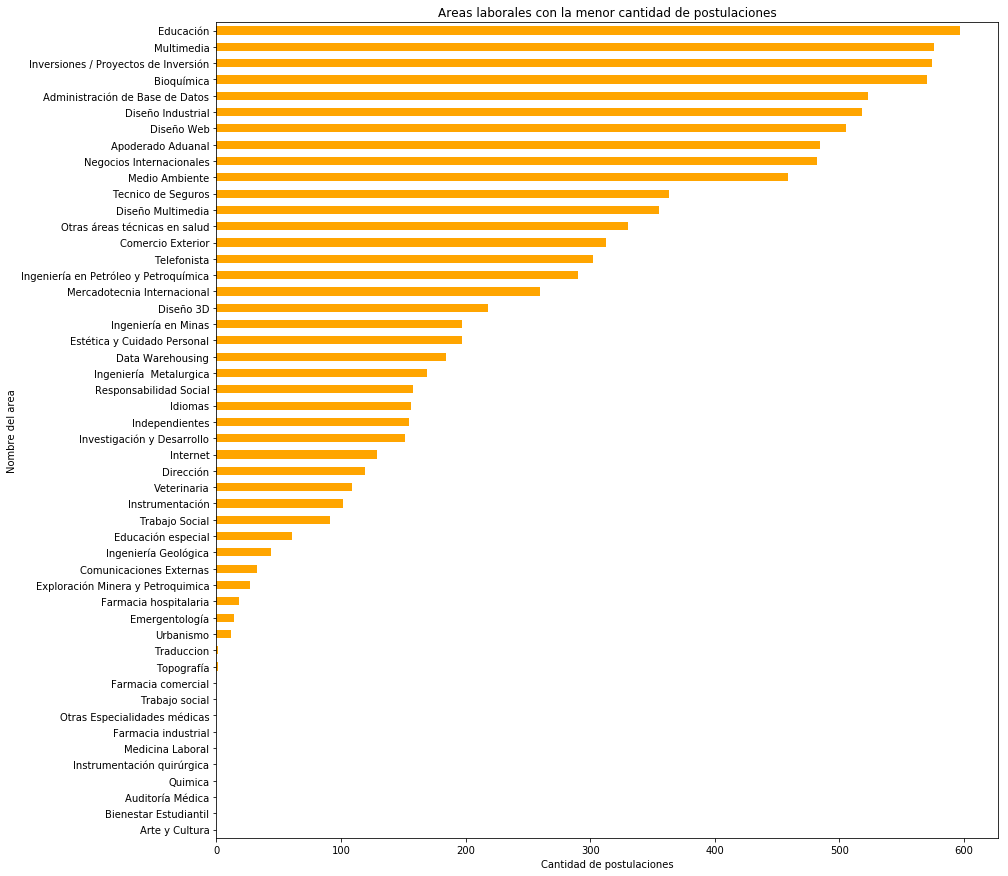

In [10]:
ax = plt.gca()
postulaciones_con_detalle_de_aviso.groupby('nombre_area')['nombre_area'].count().sort_values(ascending=True).head(50)\
                                     .plot(kind='barh', figsize=(14,15), color='orange', title='Areas laborales con la menor cantidad de postulaciones');
ax.set_xlabel('Cantidad de postulaciones');
ax.set_ylabel('Nombre del area');

# Que tipos de trabajo buscan los estudiantes universitarios?

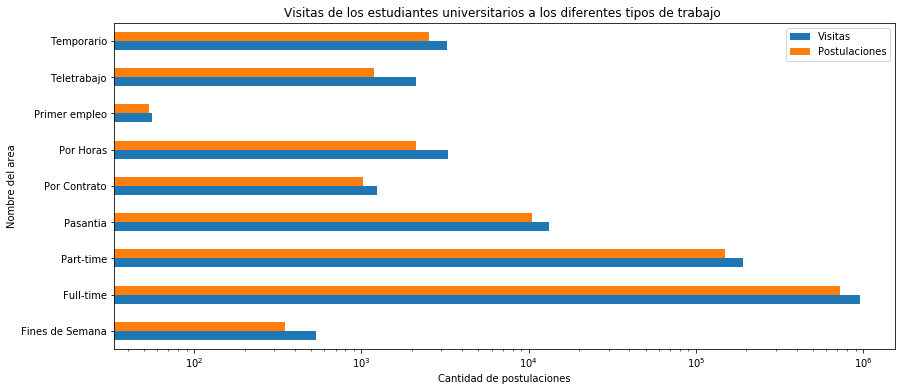

In [58]:
ax = plt.gca()

dataFrame = pd.DataFrame()

dataFrame['Visitas'] = (visitas_con_detalle_de_aviso_y_usuario[\
    (visitas_con_detalle_de_aviso_y_usuario.nombre == 'Universitario') &           
    (visitas_con_detalle_de_aviso_y_usuario.estado == 'En Curso')             
]).groupby(['tipo_de_trabajo'])['idaviso'].count()

dataFrame['Postulaciones'] = (postulaciones_con_detalle_de_aviso_y_usuario[\
    (postulaciones_con_detalle_de_aviso_y_usuario.nombre == 'Universitario') &                                                                   
    (postulaciones_con_detalle_de_aviso_y_usuario.estado == 'En Curso'     )                    
]).groupby(['tipo_de_trabajo'])['idaviso'].count() 

# Esta cuenta es porque las visitas que provienen de CSV, solo cuentan las visitas que no terminaron en postulacion
dataFrame['Visitas'] = dataFrame['Visitas'] + dataFrame['Postulaciones']
                               
dataFrame.plot(kind='barh', figsize=(14,6), logx=True, ax=ax, title='Visitas de los estudiantes universitarios a los diferentes tipos de trabajo ');
ax.set_xlabel('Cantidad de postulaciones');
ax.set_ylabel('Nombre del area');